# Teste do módulo KMer
### **Aluno:** Alexandre Areias Castro PG45962

In [2]:
import sys
sys.path.append("/Users/alexandre/Documents/Mestrado/2º Ano/SIB/si/src")
from sklearn.preprocessing import StandardScaler
from si.io.csv import read_csv
from si.feature_extraction.k_mer import KMer
from si.model_selection.split import train_test_split
from si.linear_model.logistic_regression import LogisticRegression

## Teste para composição nucleotídica (DNA)

In [3]:
tfbs_path = "/Users/alexandre/Documents/Mestrado/2º Ano/SIB/si/datasets/tfbs.csv"
tfbs = read_csv(tfbs_path, features=True, label=True)
tfbs.print_dataframe()

/Users/alexandre/Documents/Mestrado/2º Ano/SIB/si/src/si/io/csv.py:18: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  dataframe = pd.read_csv(filename, sep)


,sequence
0,CCGAGGGCTATGGTTTGGAAGTTAGAACCCTGGGGCTTCTCGCGGA...
0,GAGTTTATATGGCGCGAGCCTAGTGGTTTTTGTACTTGTTTGTCGC...
0,GATCAGTAGGGAAACAAACAGAGGGCCCAGCCACATCTAGCAGGTA...
1,GTCCACGACCGAACTCCCACCTTGACCGCAGAGGTACCACCAGAGC...
1,GGCGACCGAACTCCAACTAGAACCTGCATAACTGGCCTGGGAGATA...
...,...
0,GTCGCGCGGGTGCGGAGGATGAGTCGCAGACGCATTTATGTCGCCC...
1,GTTCGCAGCGTATTGAGTAATGTTTGACTCGACCGAACTCCATATT...
0,ACTCGCTGTCCACGTCTATTCCTAGGGGTTTTATTTCGCAAGGTGA...
1,TGCAAAGGGGCGACCGAACTCCCTTTACCGCGGAGTTATTCATAAT...


In [4]:
k_mer = KMer(k=3, alphabet="DNA")
kmer_dataset = k_mer.fit_transform(tfbs)
kmer_dataset.print_dataframe()

,AAA,AAC,AAT,AAG,ACA,ACC,ACT,ACG,ATA,ATC,...,GCT,GCG,GTA,GTC,GTT,GTG,GGA,GGC,GGT,GGG
0,0.00,0.02,0.00,0.02,0.02,0.04,0.00,0.00,0.00,0.00,...,0.04,0.02,0.00,0.00,0.04,0.00,0.04,0.04,0.02,0.06
0,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.02,0.00,...,0.00,0.06,0.02,0.04,0.06,0.02,0.00,0.02,0.02,0.00
0,0.04,0.04,0.00,0.00,0.06,0.00,0.00,0.00,0.00,0.04,...,0.00,0.00,0.04,0.00,0.00,0.00,0.02,0.02,0.02,0.04
1,0.00,0.02,0.00,0.00,0.00,0.10,0.02,0.02,0.00,0.00,...,0.00,0.00,0.02,0.02,0.00,0.00,0.00,0.00,0.02,0.00
1,0.00,0.08,0.00,0.00,0.00,0.04,0.06,0.00,0.04,0.00,...,0.00,0.02,0.00,0.00,0.00,0.00,0.02,0.04,0.02,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,...,0.00,0.06,0.00,0.06,0.00,0.02,0.04,0.00,0.02,0.02
1,0.00,0.02,0.02,0.00,0.00,0.02,0.04,0.00,0.02,0.00,...,0.00,0.02,0.04,0.02,0.04,0.00,0.00,0.00,0.00,0.00
0,0.00,0.00,0.00,0.02,0.00,0.00,0.04,0.02,0.02,0.00,...,0.02,0.00,0.00,0.04,0.02,0.02,0.00,0.00,0.04,0.04
1,0.02,0.02,0.02,0.02,0.00,0.04,0.02,0.00,0.02,0.00,...,0.00,0.04,0.00,0.00,0.02,0.00,0.02,0.02,0.00,0.04


In [6]:
kmer_dataset.X = StandardScaler().fit_transform(kmer_dataset.X)

train, test = train_test_split(kmer_dataset)

lg_model = LogisticRegression(max_iter=5000)
lg_model.fit(train)

lg_model.score(test)

0.96

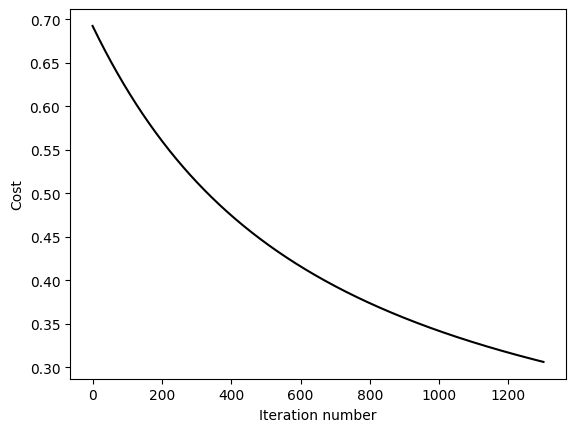

In [7]:
lg_model.plot_cost_history()

# Exercício 9: Adapta o KMer para calcular a composição peptídica.

#### 9.1) O KMer deve ser capaz de calcular a composição nucleotídica e peptídica. Podes adicionar um novo parâmetro chamado alphabet onde o utilizador fornece o alfabeto da sequência biológica.

####  9.2) Testa o novo KMer para sequências de aminoácidos:
1. Usa o dataset transporters.csv. Inspeciona o conteúdo do dataset.
2. Usa o KMer para obter a frequência de cada substring em cada sequência do dataset. Tamanho da substring (k): 2
3. Usa o sklearn.preprocessing.StandardScaler para standardizar o dataset da composição pepetídica.<br>dataset.X = StandardScaler().fit_transform(dataset.X)
4. Divide o dataset em treino e teste.
5. Treina o modelo LogisticRegression no dataset de composição pepetídica.
6. Qual o score obtido?

In [9]:
transporters_path = "/Users/alexandre/Documents/Mestrado/2º Ano/SIB/si/datasets/transporters.csv"
transporters = read_csv(transporter_path, features=True, label=True)
transporters.print_dataframe()

/Users/alexandre/Documents/Mestrado/2º Ano/SIB/si/src/si/io/csv.py:18: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  dataframe = pd.read_csv(filename, sep)


,Sequence
1,MKKTLIALSVSAAAMATGVNAAELYNQDGTSLEMGGRAEARLSMKD...
0,MRIGVYVCHCGLNIAGVIDVSALEEMAGELEDVVLAREVQFLCSDS...
1,MELKNKKLSLWEAVSMAVGVMIGASIFSIFGVGAKIAGRNLPETFI...
0,MHLPSLSVALALVSSSLALPQAVLPENDVSSRAAAVKEAFSHAWDG...
0,MEELVGLREGFSGDPVTLQELWGPCPHIRRAIQGGLEWLKQKVFRL...
...,...
0,MKIKDALIKAYSVLKETNDEFYMEDSQILLSYVLKKDRIFLITNRE...
1,MSIATIVPENAVIGQAVNIRSMETDIVSLDDRLLQAFSGSAIATAV...
1,MTAYIQRSQCISTSLLVVLTTLVSCQIPRDRLSNIGVIVDEGKSLK...
1,MTEASEINLSDIKGPIDVNTPITNHRTALIQNYSTKPKLTYQTVFG...


In [11]:
kmer_peptidic = KMer(k=3, alphabet="PROT")
kmer_peptidic_data = kmer_peptidic.fit_transform(transporters)
kmer_peptidic_data.print_dataframe()

,FFF,FFL,FFI,FFM,FFV,FFS,FFP,FFT,FFA,FFY,...,GGH,GGQ,GGN,GGK,GGD,GGE,GGC,GGW,GGR,GGG
1,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.002967,0.000000,0.0,0.000000,0.0,0.0,0.002967,0.000000
0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.001261,0.0,...,0.0,0.0,0.000000,0.001261,0.0,0.000000,0.0,0.0,0.001261,0.001261
1,0.000000,0.002299,0.002299,0.0,0.000000,0.0,0.0,0.002299,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.002299,0.000000
0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.002028,0.002028
0,0.001456,0.001456,0.000000,0.0,0.001456,0.0,0.0,0.000000,0.001456,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.003509,0.0,0.0,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.001996,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000


In [12]:
kmer_peptidic_data.X = StandardScaler().fit_transform(kmer_peptidic_data.X)

In [13]:
train, test = train_test_split(kmer_peptidic_data)

In [14]:
lg_model_peptidic = LogisticRegression(max_iter=2000)
lg_model_peptidic.fit(train)

In [15]:
lg_model_peptidic.score(test)

0.7711442786069652

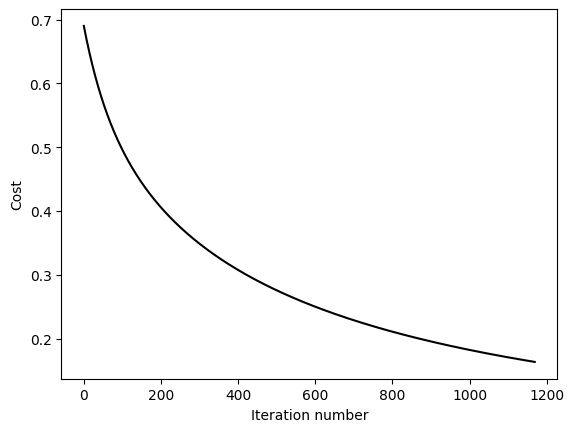

In [16]:
lg_model_peptidic.plot_cost_history()